In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import xml.etree.ElementTree as ET

In [3]:
dir = 'runkeeper-data-export-995530-2016-04-10-1425/'

In [4]:
rundurations = pd.read_csv(dir + 'cardioActivities.csv', parse_dates=[0], index_col=[0])

In [5]:
def convert_duration(s):
    l = map(lambda e: int(e), s.split(':'))
    mins = l[0]+l[1]/60.
    return mins # pd.to_timedelta(mins, unit='m')

In [6]:
def get_direction(f):
    if f == '2016-01-22-0852.gpx': return 'linden'
    
    tree = ET.parse(dir + f)
    root = tree.getroot()
    ns = 'http://www.topografix.com/GPX/1/1'
    trkpts = root.findall('.//{' + ns + '}trkpt')
    start = trkpts[0].attrib['lat']
    end = trkpts[-1].attrib['lat']
    if start < end: return 'linden'
    elif start > end: return 'loop'
# get_direction('2016-01-22-0852.gpx')

In [7]:
rundurations['Duration'] = rundurations['Duration'].map(convert_duration)

In [8]:
rundurations['Direction'] = rundurations['GPX File'].map(get_direction)

In [9]:
len(rundurations)

78

In [10]:
rundurations.groupby('Direction').count()

,Type,Route Name,Distance (mi),Duration,Average Pace,Average Speed (mph),Calories Burned,Climb (ft),Average Heart Rate (bpm),Notes,GPX File
Direction,,,,,,,,,,,
linden,39,0,39,39,39,39,39,39,0,38,39
loop,39,0,39,39,39,39,39,39,0,32,39


In [11]:
from matplotlib import pyplot as plt

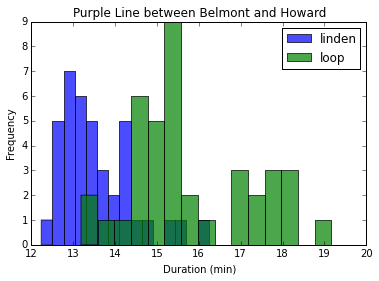

In [12]:
rundurations.groupby('Direction')['Duration'].plot.hist(bins=15, alpha=.7)
plt.xlabel('Duration (min)')
plt.title('Purple Line between Belmont and Howard')
plt.legend()

In [13]:
rundurations[['Direction', 'Duration', 'Average Speed (mph)']].groupby('Direction').mean()

,Duration,Average Speed (mph)
Direction,,
linden,13.531624,26.082564
loop,15.800000,22.471282
